# Vesselprofile comparison with normalized Fourier descriptors

# Load data

In [8]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
from fourier_utils import draw_reconsturcted_descriptor
import matplotlib as mpl
import cv2 as cv 

In [9]:
def load_npz(npz_filename):
    out = []
    f = np.load(npz_filename)
    for item in f.items():
        label, image = item
        out.append(image)
    f.close()
    return out


In [10]:
base = 'saved_arrays/'
origs = load_npz(base+'images.npz')
masks = load_npz(base+'masks.npz')
#knn
distances = np.load(base+'distances.npy')
indices = np.load(base+'indices.npy')

#descriptors
d_mag = np.load(base+'mag_descr_not_normalized.npy')
descriptors = np.load(base+'phase_descr.npy')

#tnse
X_2d = np.load(base+'tsne.npy')

# t-SNE & GMM clustering with 10 clusters 


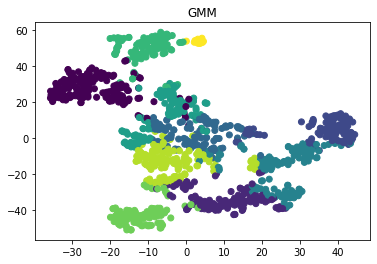

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
clustering = gmm.fit_predict(descriptors)
plt.title('GMM')
plt.scatter(X_2d[:,0],X_2d[:,1],c=clustering)

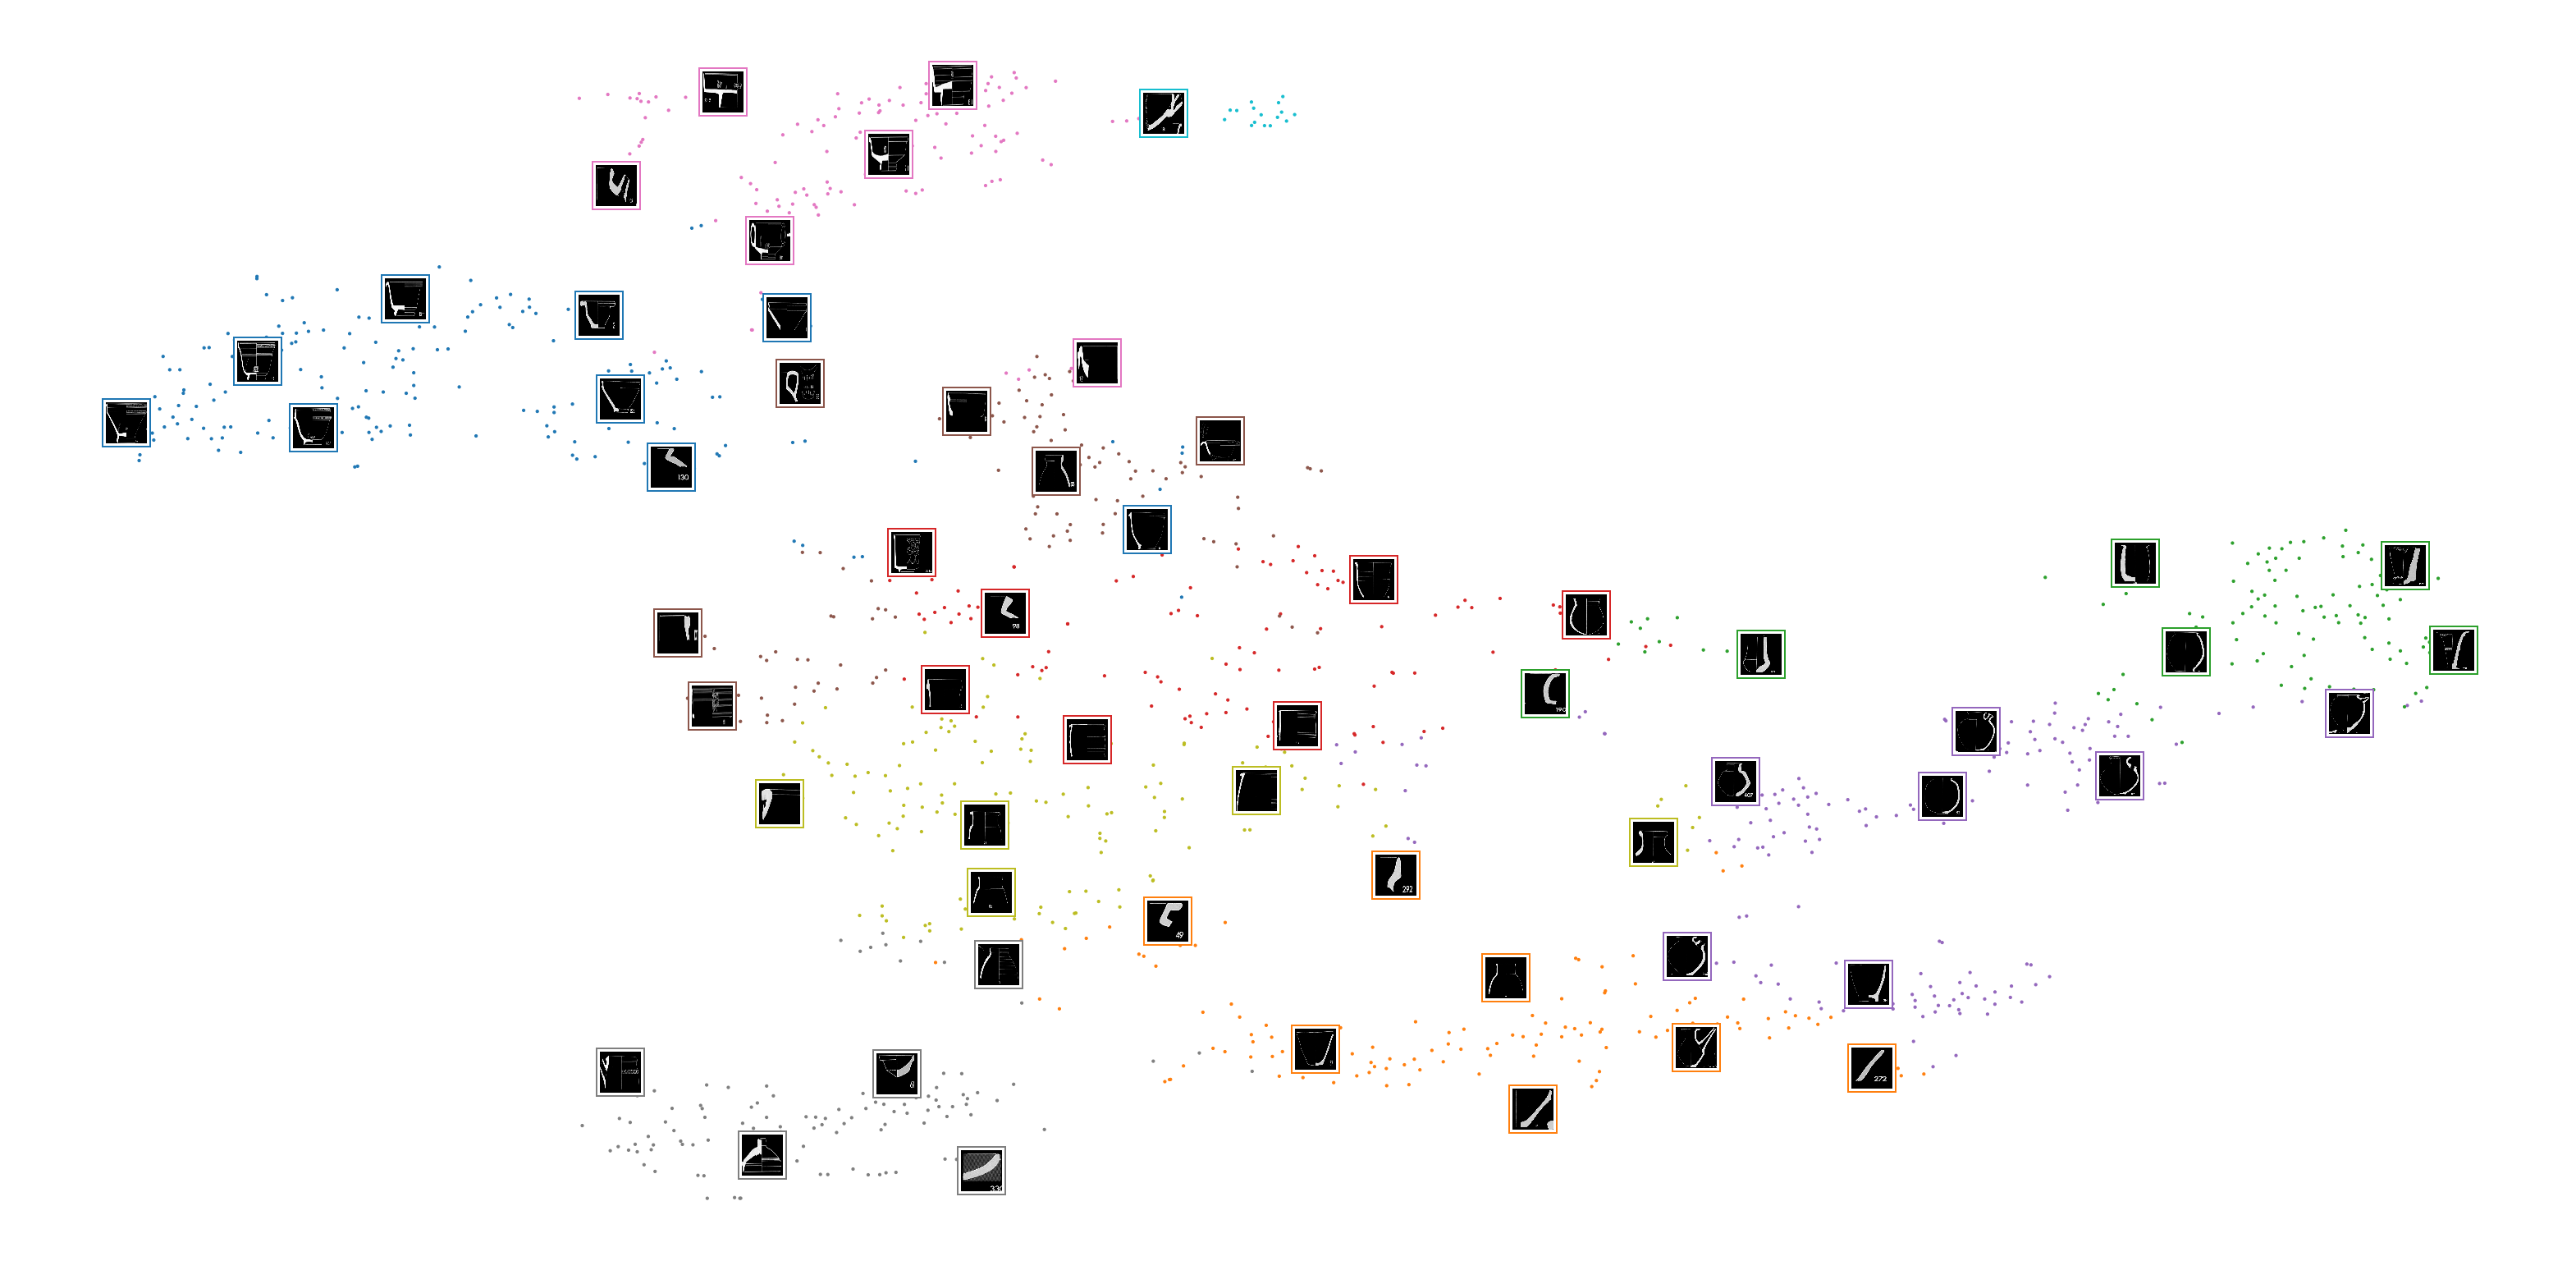

In [12]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(56, 28))
cmap = plt.cm.tab10
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clustering, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_2d):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 40: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(cv.resize(origs[index],(50,50)), cmap="binary"),
            position, bboxprops={"edgecolor": cmap(clustering[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
#save_fig("fashion_mnist_visualization_plot")
plt.show()

# Show 5 nearest neighbors (re run cell to see new examples)

<Figure size 4032x4032 with 0 Axes>

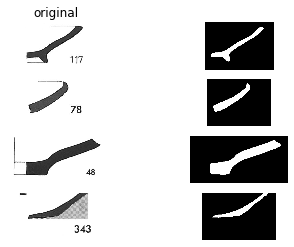

In [13]:
index = np.random.randint(0,len(origs))
fig = plt.figure(figsize=(56, 56))
f, axarr = plt.subplots(4,2)
[axi.set_axis_off() for axi in axarr.ravel()]
axarr[0,0].imshow(origs[indices[index,0]],cmap='gray')
axarr[0,0].set_title('original')
axarr[0,1].imshow(masks[indices[index,0]],cmap='gray')

axarr[1,0].imshow(origs[indices[index,1]],cmap='gray')
axarr[1,1].imshow(masks[indices[index,1]],cmap='gray')

axarr[2,0].imshow(origs[indices[index,2]],cmap='gray')
axarr[2,1].imshow(masks[indices[index,2]],cmap='gray')

axarr[3,0].imshow(origs[indices[index,3]],cmap='gray')
axarr[3,1].imshow(masks[indices[index,3]],cmap='gray')




# Show mean shape (re run cell to see mean from examples above)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 399.5, 277.5, -0.5)

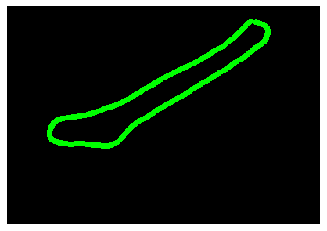

In [14]:
i1 = indices[index,0]
i2 = indices[index,1]
i3 = indices[index,2]
i4 = indices[index,3]
a = np.stack((d_mag[i1],d_mag[i2],d_mag[i3],d_mag[i4]))
m = np.mean(a,axis=0)
plt.imshow(draw_reconsturcted_descriptor(m,100,origs[i1].shape,thickness=5))
plt.axis('off')